<br>
<br>

#### Name: Saugat Neupane
#### College: Jain University, Bangalore
#### Email: nsaugat99@gmail.com

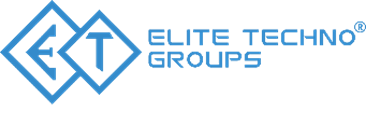 
#         <br>                                                 Project – Predict the City Taxi Trip Duration

### Challenges
#### Business Goal: 
To improve the efficiency of electronic taxi dispatching systems it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.<br>
#### ML Goal:
To build a model that predicts the total ride duration of taxi trips in New York City


In this project, I use numpy, pandas, matplotlib, seaborn and scikit learn libraries which are the powerful libraries for data cleaning, data preparation, visualization and modelling of data.<br>


In [1]:
# importing necessary libraries for step 1 and 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians

## Step 1: Data Gathering

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform.

In [2]:
train = pd.read_csv("C:/Users/Admin/Programming/python libraries/train.csv")
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


### About the data:
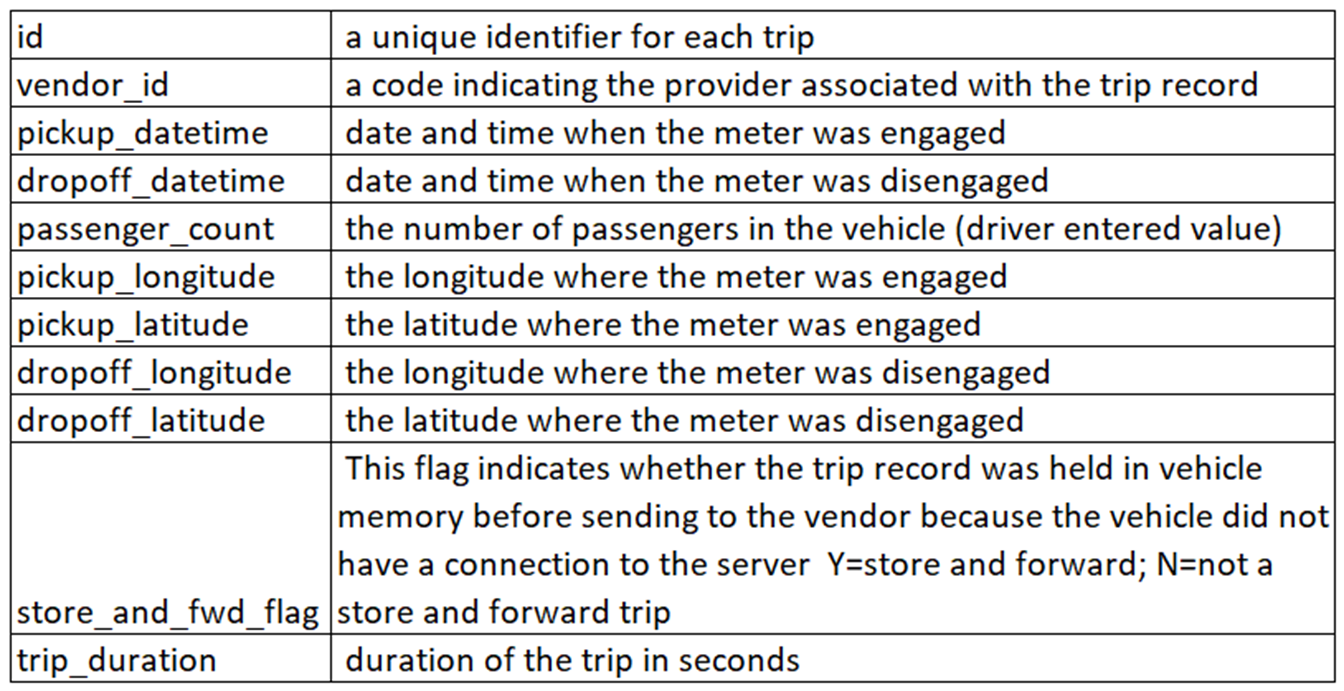

The first column 'id' may not be used in the analysis. So, I set the id to the index.

In [3]:
train.set_index("id", inplace = True)
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Step 2: Data Pre-Processing
### Missing Value Analysis

Missing value analysis is an essential step in data preprocessing and analysis. It involves identifying and handling missing values in a dataset to ensure the integrity and accuracy of the analysis.

In [4]:
train.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We use .isnull() method available in the pandas library. Luckily we encounter no missing value as shown in above output.

### Data Cleaning and Exploratory Data Analysis

Next, Let's have a look at a statistical summary of the data to identify any obvious outliers.

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


From the above summary, observing min and max, we have some clue that there may be some outliers in 'passenger_count','trip_duration' and 'pickup and dropoff longitude and lattitude'. 

#### passenger_count
We can see there are 0 passengers in some cabs and some cab have 9 passengers. Having 0 passengers in a cab seems so unlikely. On the other hand, according to the NYC Taxi & Limousine Commission, the maximum number of people allowed in a yellow taxicab, by law, is five passengers (in a five passenger taxicab). There are exceptions for passengers under the age of 7 who may sit on an adult's lap. But having 4 children in lap also may not sound fair.

In [6]:
train['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8], dtype=int64)

We get to know that passenger count varies from 0 to 9. We try to view it graphically in a countplot.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

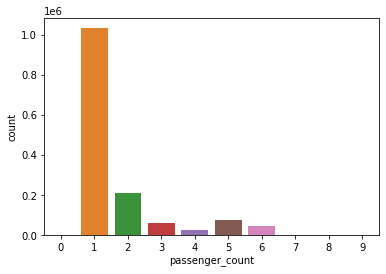

In [7]:
sns.countplot(data=train,x='passenger_count')

From the countplot, we are sure that there are 0-9 passengers in each cab but the numbers of passengers less than 1 and more than 6 are so less. They are outliers in our data and hence can be ignored.

In [8]:
# train.drop(train[(train['passenger_count'] < 1) | (train['passenger_count'] > 7)].index,inplace=True)
# train
train = train[train['passenger_count']>0]
train = train[train['passenger_count']<7]

#### Longitude and Latitude Coordinates
The latitude and longitude coordinates ranges of New York City are as follows:

Latitude is between 40.7128 and 40.748817 <br>
Longitude is between - 74.0059 and - 73.968285 <br>

The statisical summary of pick-up and drop-off coordinates show max and min observations that fall outside of the NYC city coordinate range. We will have look into such outliers using histplot using the coordinate ranges as outlier limit.

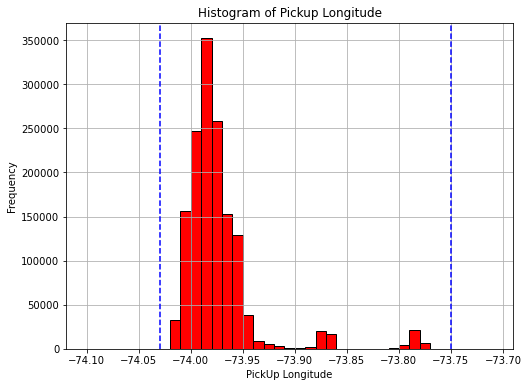

In [9]:
bins = np.arange(-74.1,-73.7,0.01)
plt.figure(figsize=(8, 6))
plt.hist(train['pickup_longitude'], bins=bins, color='r', edgecolor='black')
plt.xlabel('PickUp Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Pickup Longitude')
plt.grid(True)
outlier_values = [-73.75, -74.03]
for outlier in outlier_values:
    plt.axvline(x=outlier, color='blue', linestyle='--', label='Outlier')
plt.show()


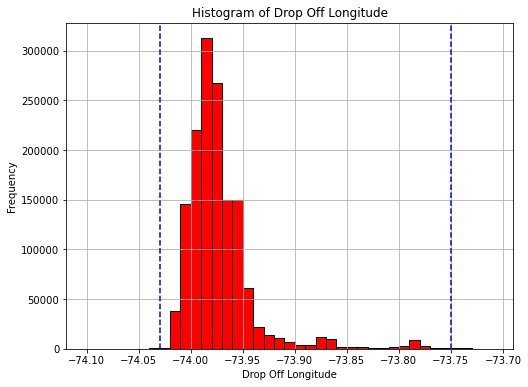

In [10]:
bins = np.arange(-74.1,-73.7,0.01)
plt.figure(figsize=(8, 6))
plt.hist(train['dropoff_longitude'], bins=bins, color='r', edgecolor='black')
plt.xlabel('Drop Off Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Drop Off Longitude')
plt.grid(True)
outlier_values = [-73.75, -74.03]
for outlier in outlier_values:
    plt.axvline(x=outlier, color='blue', linestyle='--', label='Outlier')
plt.show()

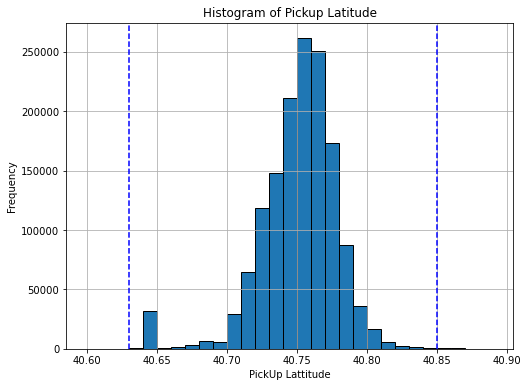

In [11]:
bins = np.arange(40.6,40.9,0.01)
plt.figure(figsize=(8, 6))
plt.hist(train['pickup_latitude'],bins=bins, edgecolor='black')
plt.xlabel('PickUp Lattitude')
plt.ylabel('Frequency')
plt.title('Histogram of Pickup Latitude')
plt.grid(True)
outlier_values = [40.63,40.85]
for outlier in outlier_values:
    plt.axvline(x=outlier, color='blue', linestyle='--', label='Outlier')
plt.show()

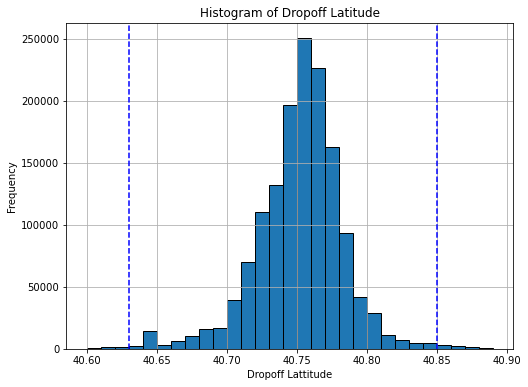

In [12]:
bins = np.arange(40.6,40.9,0.01)
plt.figure(figsize=(8, 6))
plt.hist(train['dropoff_latitude'], bins=bins, edgecolor='black')
plt.xlabel('Dropoff Lattitude')
plt.ylabel('Frequency')
plt.title('Histogram of Dropoff Latitude')
plt.grid(True)
outlier_values = [40.63,40.85]
for outlier in outlier_values:
    plt.axvline(x=outlier, color='blue', linestyle='--', label='Outlier')
plt.show()

In four of the histograms, we are able to see some of the histplots that lie beyound the blue margin which I have coded as outlier in the code. So, we neglect those pickup and dropoff locations to make this report entirely New York Based.

In [13]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.5]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

#### Trip Duration
On the statistical summary in the above table, we noticed that the maximum ob|servation for taxi duration is 3526282 which may not be possible. On the other hand, the min observation is 1 sec which may be trip cancelltion or something. So we consider this min observation and try to remove max observation.

In [14]:
trip_duration_mean = np.mean(train['trip_duration'])
trip_duration_std = np.std(train['trip_duration'])
train = train[train['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
train = train[train['trip_duration']>= trip_duration_mean - 2*trip_duration_std]

For our data, we use empirical rule or 68-95-99.7 rule. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean.For our case, I use the formula where 95% of the data falls within two standard deviations i.e. µ ± 2σ.

In [15]:
train.describe().transpose() # summarizing the data to observe the removal of outliers

,count,mean,std,min,25%,50%,75%,max
vendor_id,1438339.0,1.534332,0.498820,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,1438339.0,1.664226,1.314170,1.000000,1.000000,1.000000,2.000000,6.000000
pickup_longitude,1438339.0,-73.973695,0.037444,-74.029953,-73.991867,-73.981758,-73.967461,-73.750664
pickup_latitude,1438339.0,40.750988,0.027554,40.630001,40.737446,40.754101,40.768322,40.849998
dropoff_longitude,1438339.0,-73.973329,0.033614,-74.029999,-73.991287,-73.979843,-73.963432,-73.501266
dropoff_latitude,1438339.0,40.751621,0.029703,40.630001,40.736214,40.754490,40.769512,40.849998
trip_duration,1438339.0,825.242811,645.524647,1.000000,394.000000,655.000000,1058.000000,11411.000000


If we compare the last two outputs via .describe() method, we can see notable change in the output as well as in our data set.

#### Converting no-null object into date time frame
The pickup and dropoff timestamp variables are being treated as non-null objects. These features should be specified as date objects to allow for easier feature engineering and analysis.

In [16]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [17]:
train.head(20)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255


#### Time period of the dataset

In [18]:
print("Min pickup time:",min(train['pickup_datetime']))
print("Max pickup time:",max(train['pickup_datetime']))

Min pickup time: 2016-01-01 00:00:17
Max pickup time: 2016-06-30 23:59:39


The above dataset contains the data between January 1 and June 30 of the year 2016.

### Feature Engineering

#### Haversine Distance

The Haversine distance is a formula used to calculate the great-circle distance between two points on the surface of a sphere, such as the Earth. It is often used to measure the distance between two locations specified by their latitude and longitude coordinates.

In [19]:
def calculate_haversine_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    R = 6373.0  # approximate radius of the Earth in km

    pickup_lat_rad = np.radians(pickup_latitude)
    pickup_lon_rad = np.radians(pickup_longitude)

    dropoff_lat_rad = np.radians(dropoff_latitude)
    dropoff_lon_rad = np.radians(dropoff_longitude)

    dlon = dropoff_lon_rad - pickup_lon_rad
    dlat = dropoff_lat_rad - pickup_lat_rad

    a = np.sin(dlat / 2) ** 2 + np.cos(pickup_lat_rad) * np.cos(dropoff_lat_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [20]:
train['haversine_distance'] = calculate_haversine_distance(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])

Hence we have add another feature named as haversine_distance.

In [21]:
train['pickup_month'] = train['pickup_datetime'].dt.month
train['day_of_week'] = train['pickup_datetime'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train['day_of_week'] = train['day_of_week'].map(lambda x: day_names[x])
train['day_of_week']

id
id2875421       Monday
id2377394       Sunday
id3858529      Tuesday
id3504673    Wednesday
id2181028     Saturday
               ...    
id2376096       Friday
id1049543       Sunday
id2304944       Friday
id2714485      Tuesday
id1209952      Tuesday
Name: day_of_week, Length: 1438339, dtype: object

Using the date time frame, we created some features which are important for our later analysis.

In [22]:
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_hour'].head(10)

id
id2875421    17
id2377394     0
id3858529    11
id3504673    19
id2181028    13
id0801584    22
id1813257    22
id1324603     7
id1301050    23
id0012891    21
Name: pickup_hour, dtype: int64

Text(0.5, 1.0, 'pickup hours distribution')

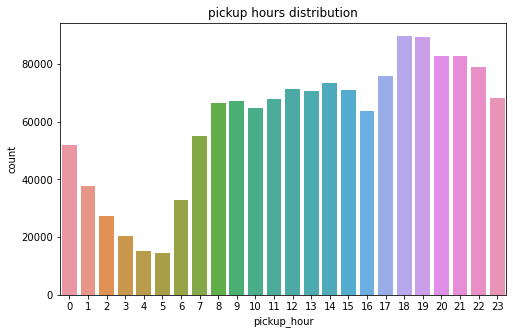

In [23]:
plt.figure(figsize = (8, 5))
sns.countplot(x = train['pickup_hour']).set_title('pickup hours distribution')

<br>The pickup in the taxi actually increases from 6:00 pm in the evening and remains in peak till 8:00 pm. It increases from 7:00 am in the morning. The possible reason might be the time to go to work in the early morning and evening is time to come home or go out.

<br>
We try to look at the day where the taxi had to travel more haversine distance.

In [24]:
averageDis = train.groupby('day_of_week')['haversine_distance'].mean()
averageDis

day_of_week
Friday       3.264554
Monday       3.432504
Saturday     3.198026
Sunday       3.564771
Thursday     3.280890
Tuesday      3.214283
Wednesday    3.212836
Name: haversine_distance, dtype: float64

The same result can be plotted in a point plot.

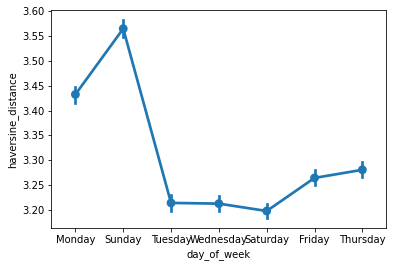

In [25]:
sns.pointplot(x='day_of_week',y='haversine_distance',data=train);

Now, I try to look at the dependence of a feature with another feature using correlation.

<AxesSubplot:>

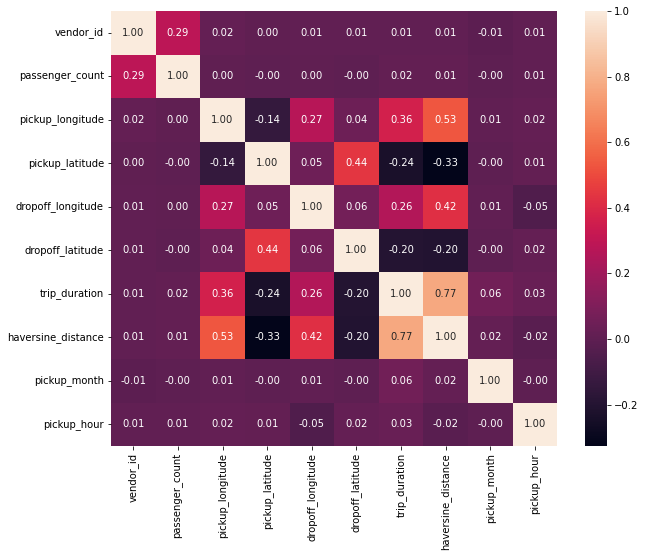

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,fmt='.2f')


Looking at the heatmap, we can remove some redundant features and the features which are no more related in the modelling.

In [27]:
train.drop(['pickup_datetime','dropoff_datetime'],axis=1,inplace=True)
train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'haversine_distance', 'pickup_month', 'day_of_week',
       'pickup_hour'],
      dtype='object')

### Developing Algorithm

In our data, we have some features that contain non-numeric data in which we cannot apply linear or lasso regression. So to avoid this kind of problem we convert such variables into codes using LabelEncoder available in sklearn library.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
store_and_fwd_flag = LabelEncoder()
day_of_week = LabelEncoder()
vendor_id = LabelEncoder()

In [30]:
train.head(20)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance,pickup_month,day_of_week,pickup_hour
id,,,,,,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,3,Monday,17
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,6,Sunday,0
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,1,Tuesday,11
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,4,Wednesday,19
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,3,Saturday,13
id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.099287,1,Saturday,22
id1813257,1,4,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326695,6,Friday,22
id1324603,2,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.716775,5,Saturday,7
id1301050,1,1,-73.999481,40.738400,-73.985786,40.732815,N,255,1.310765,5,Friday,23


In [31]:
train['store_and_fwd_flag'] = store_and_fwd_flag.fit_transform(train['store_and_fwd_flag'])
train['day_of_week'] = day_of_week.fit_transform(train['day_of_week'])
train['vendor_id'] = vendor_id.fit_transform(train['vendor_id'])

#### Choosing X and y
The data to be predicted is taken as y which is trip_duration in our project. Meanwhile the features in which the predicted value depends are chosen as X.

In [32]:
y = train['trip_duration']
X = train[['vendor_id', 'passenger_count', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','store_and_fwd_flag','pickup_month', 'pickup_hour','day_of_week','haversine_distance']] 

In [33]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_hour,day_of_week,haversine_distance
id,,,,,,,,,,,
id2875421,1,1,-73.982155,40.767937,-73.964630,40.765602,0,3,17,1,1.498991
id2377394,0,1,-73.980415,40.738564,-73.999481,40.731152,0,6,0,3,1.806074
id3858529,1,1,-73.979027,40.763939,-74.005333,40.710087,0,1,11,5,6.387103
id3504673,1,1,-74.010040,40.719971,-74.012268,40.706718,0,4,19,6,1.485965
id2181028,1,1,-73.973053,40.793209,-73.972923,40.782520,0,3,13,2,1.188962
...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,4,-73.982201,40.745522,-73.994911,40.740170,0,4,13,0,1.225465
id1049543,0,1,-74.000946,40.747379,-73.970184,40.796547,0,1,7,3,6.051735
id2304944,1,1,-73.959129,40.768799,-74.004433,40.707371,0,4,6,0,7.827062


In [34]:
y

id
id2875421     455
id2377394     663
id3858529    2124
id3504673     429
id2181028     435
             ... 
id2376096     778
id1049543     655
id2304944     764
id2714485     373
id1209952     198
Name: trip_duration, Length: 1438339, dtype: int64

In [35]:
# importing machine learning models 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### Train Test Split 
We choose 70% of the data for training our model and rest 30% to test the model.

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

#### Linear Regression

In [37]:
# Preparing the model
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [38]:
# Predicting the test values
ypred_lm = linearmodel.predict(X_test)

In [39]:
mse_lm = mean_squared_error(y_test,ypred_lm)
r2_lm = r2_score(y_test, ypred_lm)
rmse_lm = np.sqrt(mse_lm)
print('\nLinear Regression Performance Metrics')
print("Mean Squared Error:", mse_lm)
print("R-squared:", r2_lm)
print("Root Mean Squared Error:", rmse_lm)


Linear Regression Performance Metrics
Mean Squared Error: 163092.34485921313
R-squared: 0.6088597202477564
Root Mean Squared Error: 403.8469324623045


#### Lasso Regression

In [40]:
# Preparing the model 
alpha = 0.01  # Regularization strength
lasso_model = Lasso(alpha=alpha)

lasso_model.fit(X_train, y_train)

selected_features = X.columns[lasso_model.coef_ != 0]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_month', 'pickup_hour', 'day_of_week', 'haversine_distance'],
      dtype='object')


In [41]:
# Predicting the test values
ypredict_lasso = lasso_model.predict(X_test)

In [42]:
# Calculating the score
lasso_model.score(X_test,y_test)

0.6088585787455723

In [43]:
mse_lasso = mean_squared_error(y_test,ypredict_lasso)
r2_lasso = r2_score(y_test, ypredict_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print('\nLasso Regression Performance Metrics')
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)
print("Root Mean Squared Error:", rmse_lasso)


Lasso Regression Performance Metrics
Mean Squared Error: 163092.8208272417
R-squared: 0.6088585787455723
Root Mean Squared Error: 403.84752175448807


#### Random Forest Regressor

In [44]:
# Preparing the model
model_rf = RandomForestRegressor(max_depth=8)
model_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8)

In [45]:
# Predicting the test data
ypred_rf = model_rf.predict(X_test)

In [46]:
mse_rf = mean_squared_error(y_test,ypred_rf)
r2_rf = r2_score(y_test, ypred_rf)
rmse_rf = np.sqrt(mse_rf)
print('\nRaandom Forest Performance Metrics')
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print("Root Mean Squared Error:", rmse_rf)


Raandom Forest Performance Metrics
Mean Squared Error: 118288.89217131292
R-squared: 0.7163107170026278
Root Mean Squared Error: 343.93152250311823


## Project Conclusion:

In this project, we walked through some codes of data analysis and machine learning models. Using three different regression models, we were able to predict the total trip duration of taxi in New York City. Using both linear regression and lasso regression models, which was taught in the course provided by Elite-Techno Groups, the r-squared value were found to be 0.6088,(a coincidence). On further exploration of regression model, using random forest to predict the taxi trip duration, the r squared value was found to be 0.716.<br>
In conclusion, we successfully built a predictive model for taxi trip duration prediction in New York City. The model demonstrated promising performance, achieving accurate predictions on unseen data.<br>
I also want to thank Capabl for providing me such a beautiful chance to learn and work on machine learning models.

## Future Improvements

Despite having acceptable r squared score and accuracy of the models, some of the future improvement ways are:<br>
Incorporating real-time traffic data: Integrating live traffic information into prediction models can help account for changes in travel times due to congestion and road conditions, leading to more accurate and dynamic predictions.<br>
Dynamic pricing models: Implementing dynamic pricing strategies based on predicted trip durations and demand can optimize fares and incentivize drivers to serve high-demand areas, ultimately improving the efficiency of the taxi service.<br>
Route optimization algorithms: Leveraging advanced GPS technologies and route optimization algorithms can help taxis find the most efficient routes, reducing travel times and providing faster service to passengers.<br>
Personalized trip duration predictions: Developing personalized prediction models based on historical user preferences and behavior can cater to individual passengers' needs, providing tailored estimates for their specific trip durations.

## References

NYC Taxi and Limousine Commission (TLC) https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page <br>
Pandas Documentation: https://pandas.pydata.org/docs/ <br>
Seaborn Documentation: https://seaborn.pydata.org/ <br>
Matplotlib Documentation: https://matplotlib.org/ <br>
scikit-learn Documentation: https://scikit-learn.org/stable/ <br>
Regression Metrics in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics <br>
Haversine Formula: https://en.wikipedia.org/wiki/Haversine_formula <br>
Empirical Rule: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule <br>
Linear Regression in scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
Lasso Regression in scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html <br>
Random Forest Regressor in scikit learn: https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html <br>